<a href="https://colab.research.google.com/github/henriquevedoveli/segmentacao-clientes/blob/main/segmentacao_cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de Clientes Utilizando Modelo RFM
---
## ***Objetivo***
#### Identificar a frequência, recência e receita (modelo RFM) dos consumidores e agrupa-los por categorias de compras. Com a finalidade de poder ser realizado campanhas de marketing específicasm além de criar programas de recompensas para clientes que mais consomem.
---
### Sobre os Dados

#### Os dados utilizados são pertecentes de um banco do site de e-commerce Olist, o Dataset completo contém 26 colunas com 116581 registros.
---
### Tópicos Abordados Durante o Projeto

- Análise Exploratória dos Dados

- Método RFM

- Clusterização

- Regra do Cotovelo 

Bibliotecas Necessárias

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import datetime
import numpy as np
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans


## Importando os dados


In [ ]:
dados = pd.read_csv('dados/BancoDeDados.csv')

dados.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

## EDA (Análise Exploratória dos Dados)

---

In [ ]:
def plot_perc(st,dados):
    plt.figure(figsize=(20,10))
    sns.set_style('whitegrid')
    ax = sns.countplot(x= st,data=dados,orient='h',palette='rocket',order=dados[st].value_counts().index)
    ax.set_ylabel('Contagem',fontsize=17)
    
    sizes = []
    
    for i in ax.patches:
        height = i.get_height()
        sizes.append(height)
        ax.text(i.get_x() + i.get_width()/1.6,
              height+200,
              '{:1.2f}%'.format(height/ 116581*100),
              ha = 'center', va='bottom', fontsize=12)
        
    ax.set_ylim(0,max(sizes)*1.1)
    
    return ax

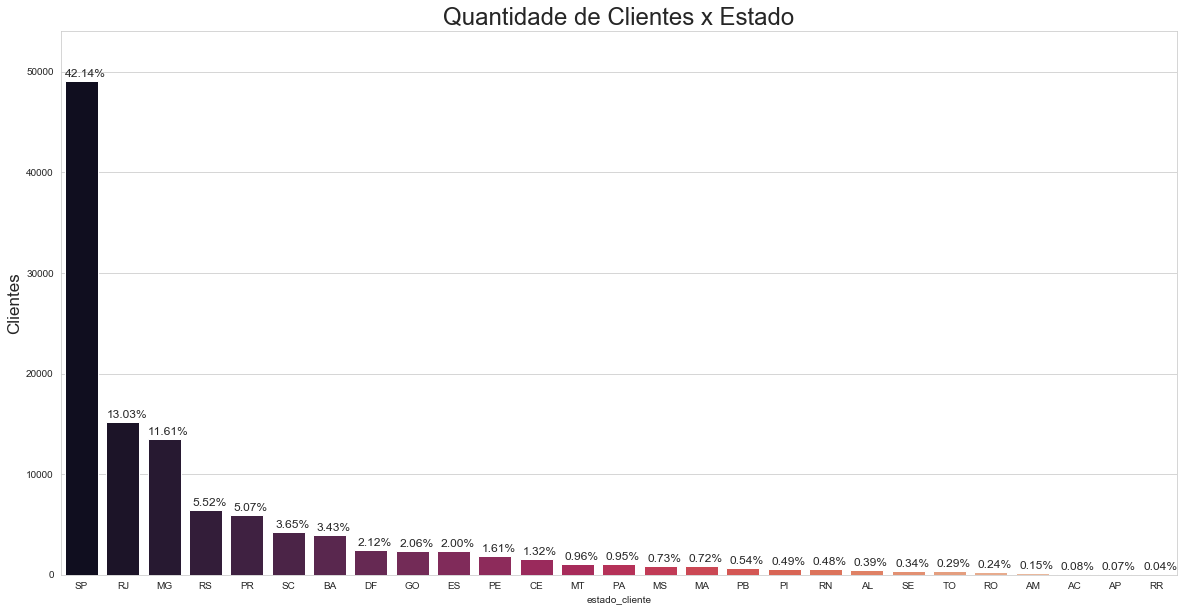

In [ ]:
ax = plot_perc('estado_cliente',dados)
ax.set_title('Quantidade de Clientes x Estado', fontsize = 24)
ax.set_ylabel('Clientes')

ax = ax

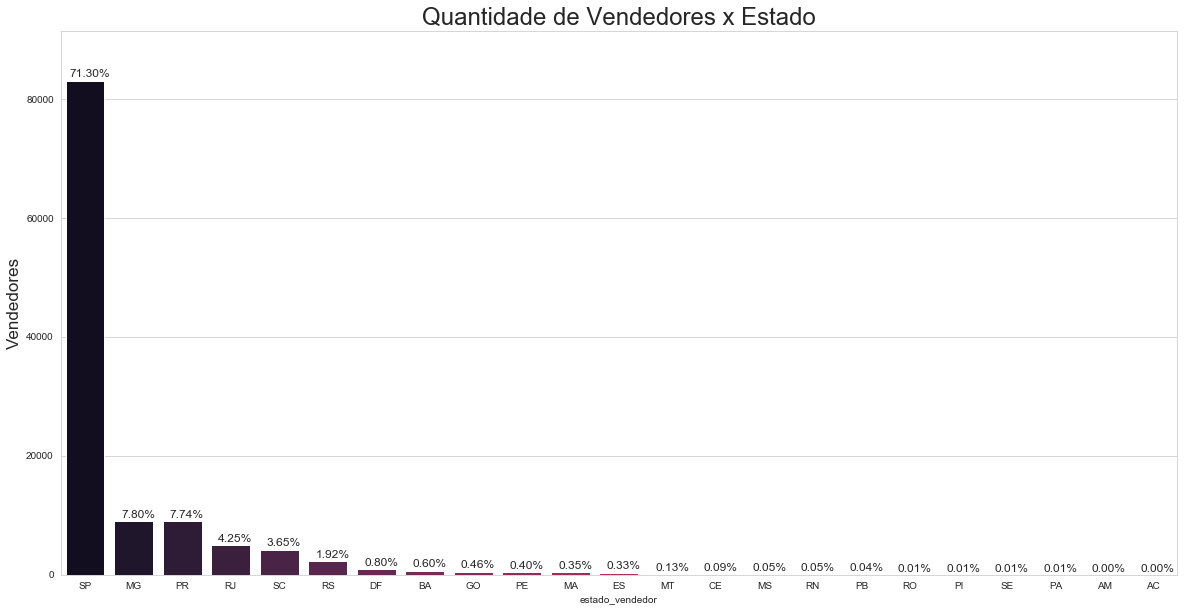

In [ ]:
ax = plot_perc('estado_vendedor',dados)
ax.set_title('Quantidade de Vendedores x Estado', fontsize = 24)
ax.set_ylabel('Vendedores')

ax = ax

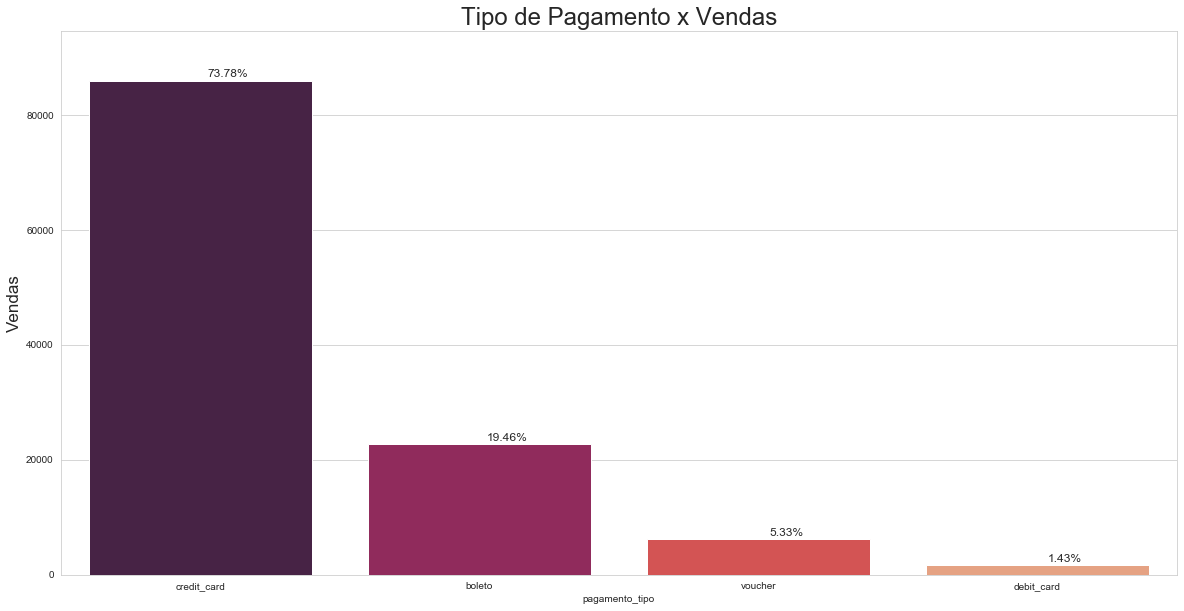

In [ ]:
ax = plot_perc('pagamento_tipo',dados)
ax.set_title('Tipo de Pagamento x Vendas', fontsize = 24)
ax.set_ylabel('Vendas')

ax = ax

## Análise Gráfica

> Podemos observar primeiramente que a maioria dos clientes realizam compras por cartão de crédito, seguido de boleto, voucher e uma pequena parcela utiliza o cartão de débito como forma de pagamento. Seria interessante aumentar as promoções para pagamentos à vista visando aumentar o número de vendas em boleto ou cartão de débito.

> Também percebe-se que a maioria dos vendedores e compradores estão no estado de São Paulo.

---

## Definindo modelo RFM

 RFM é a junção de três siglas: ***Recência, Frequência e Monetariedade***. Essa técnica lhe permite entender melhor seu cliente ao verificar quando foi sua última compra, quantas vezes ele já comprou e quanto já gastou com na empresa.

> ### Recência (R)
> ##### Há quantos dias foi a última compra desse cliente?

> ### Frequência (F)
> ##### Quantas compras esse cliente já fez na sua empresa, desde que se cadastrou?

> ### Monetaridade (M)
> ##### Quanto esse cliente já gastou em dinheiro na sua empresa?

In [ ]:
df_olist = dados[['id_unico_cliente','id_cliente','horario_pedido','item_id','preco']]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [ ]:
df_compra = dados.groupby('id_unico_cliente')['horario_pedido'].max().reset_index()
df_compra.columns = ['id_unico_cliente','DataMaxCompra']
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])
df_compra.head()

,id_unico_cliente,DataMaxCompra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [ ]:
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days
df_compra.head()

,id_unico_cliente,DataMaxCompra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


Juntando os Datasets

In [ ]:
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente','Recencia']], on ='id_unico_cliente' )
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [ ]:
def calcula_wcss(data):
    wcss = []
    for k in range(1,15):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
df_recencia = df_usuario[['Recencia']]

soma_quadrados = calcula_wcss(df_recencia)

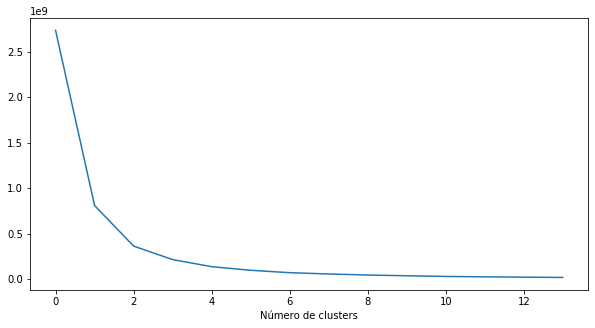

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.show()

## Número Ideal de Clusters
$$ \overline{D}(P_0, P_1, (x,y)) = \dfrac{|(y_1 - y_0) x - (x_1 - x_0) y + x_1 y_0 - y_1 x_0 |}{\sqrt{(y_1 - y_0) ^2 + (x_1 - x_0) ^2}}$$

In [ ]:
def numero_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 15, wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2

In [ ]:
n = numero_clusters(soma_quadrados)
print('Melhor número de Cluster:',n)

Melhor número de Cluster: 4


In [ ]:
kmeans=KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,3
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,3
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,2


In [ ]:
agrupado_por_cluster = df_usuario.groupby('RecenciaCluster')['Recencia'].mean().reset_index()
agrupado_por_cluster.head()

,RecenciaCluster,Recencia
0,0,67.291214
1,1,490.622269
2,2,188.381490
3,3,320.233294


In [ ]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='Recencia', ascending=False).reset_index(drop=True)
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index

agrupado_por_cluster_ordenado

,RecenciaCluster,Recencia,index
0,1,490.622269,0
1,3,320.233294,1
2,2,188.381490,2
3,0,67.291214,3


In [ ]:
juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['RecenciaCluster', 'index']], on = 'RecenciaCluster')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,0


In [ ]:
df_final = juntando_cluster.drop(['RecenciaCluster'], axis = 1)
df_final = df_final.rename(columns={'index':'RecenciaCluster'})

df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [ ]:
def ordena_cluster(cluster_nome, target_nome, df):
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    
    # quando em sort_values ascending estiver com valor False ordenara a Recencia de forma decrescente e Frequencia e Receita de forma decrescente
    if target_nome == 'Recencia':
        agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome, ascending=False).reset_index(drop=True)
    elif target_nome == 'Frequencia' or target_nome == "Receita":
        agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome, ascending=True).reset_index(drop=True)
    
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[cluster_nome, 'index']], on = cluster_nome)
    df_final = juntando_cluster.drop([cluster_nome], axis = 1)
    df_final = df_final.rename(columns={'index':cluster_nome})
    
    return df_final


In [ ]:
df_usuario = ordena_cluster('RecenciaCluster', 'Recencia', df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [ ]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0
1,30828.0,320.233294,43.971639,255.0,281.0,314.0,357.0,405.0
2,33377.0,188.381490,34.867501,129.0,159.0,188.0,219.0,254.0
3,32052.0,67.291214,36.283000,0.0,33.0,67.0,102.0,128.0


### Clusterizando a Frequencia

In [ ]:
df_frequencia = dados.groupby('id_unico_cliente')['pedido_aprovado'].count().reset_index()
df_frequencia.columns = ['id_unico_cliente','Frequencia']

df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [ ]:
df_frequencia = df_usuario[['Frequencia']]
kmean = KMeans(n_clusters = 4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)


In [ ]:
df_usuario = ordena_cluster('FrequenciaCluster', 'Frequencia', df_usuario)

df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,8853.0,5.385858,1.732439,4.0,4.0,5.0,6.0,11.0
2,1083.0,18.453370,6.963889,12.0,12.0,15.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


## Clusterizando Receita

In [ ]:
df_receita = dados.groupby('id_unico_cliente')['pagamento_valor'].sum().reset_index()
df_receita.columns = ['id_unico_cliente', 'Receita']

df_usuario = pd.merge(df_usuario, df_receita, on='id_unico_cliente')

df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


In [ ]:
df_receita = df_usuario[['Receita']]
kmean = KMeans(n_clusters = 4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_receita)

In [ ]:
df_usuario = ordena_cluster('ReceitaCluster', 'Receita', df_usuario)

df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [ ]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


## Criando um Sistema de  Pontuação

In [ ]:
df_final = df_usuario[['id_unico_cliente','Recencia','RecenciaCluster','Frequencia','FrequenciaCluster','Receita','ReceitaCluster']]
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3


In [ ]:
df_final['Pontuacao'] = df_usuario['RecenciaCluster'] + df_usuario['FrequenciaCluster'] + df_usuario['ReceitaCluster']
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0


In [ ]:
print('Pontuação Máxima:', df_final['Pontuacao'].max())
print('Pontuação Miníma:',df_final['Pontuacao'].min())

Pontuação Máxima: 7
Pontuação Miníma: 0


In [ ]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao'] >= 1, 'Segmento'] = 'Pouco Ativo'
df_final.loc[df_final['Pontuacao'] >= 3, 'Segmento'] = 'Ativo'
df_final.loc[df_final['Pontuacao'] >= 5, 'Segmento'] = 'Muito Ativo'

In [ ]:
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0,Inativo
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0,Inativo
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0,Inativo
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0,Inativo
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0,Inativo


In [ ]:
# df_final.to_csv('dadosRFM.csv')

## Análise Visual

In [ ]:
def plota_segmento(x, y, data):
    plt.figure(figsize=(12,5))
    ax = sns.scatterplot(x=x, y=y, hue = 'Segmento', data=data, size='Segmento', sizes = (50,150), size_order = ['Muito Ativo','Ativo',
                                                                                                                 'Pouco Ativo','Inativo'],
                   palette = 'muted')
    sns.set(color_codes = True, style = 'whitegrid')
    plt.show()

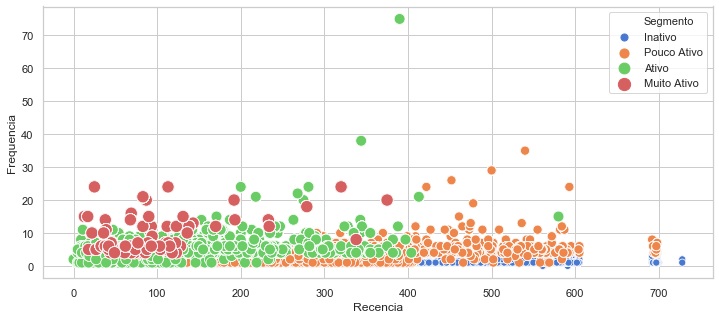

In [ ]:
plota_segmento('Recencia','Frequencia',df_final)

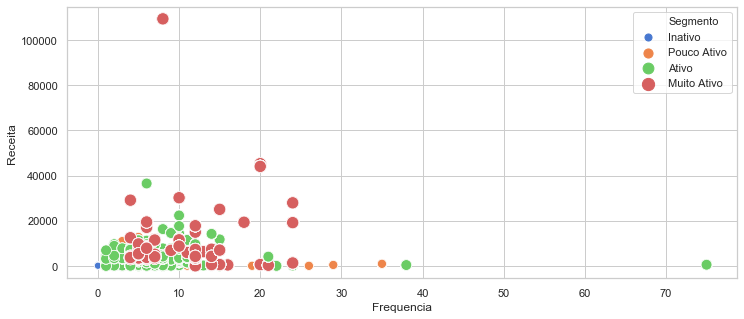

In [ ]:
plota_segmento('Frequencia','Receita',df_final)

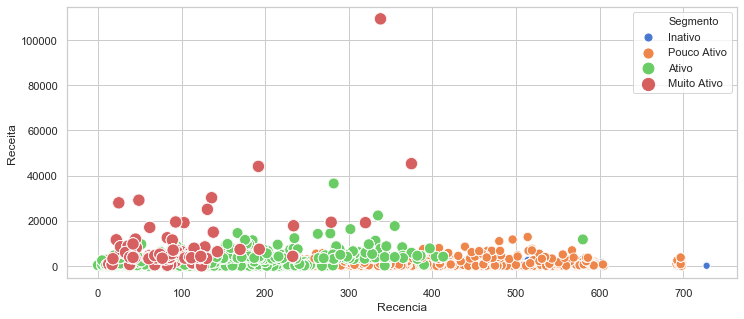

In [ ]:
plota_segmento('Recencia','Receita',df_final)

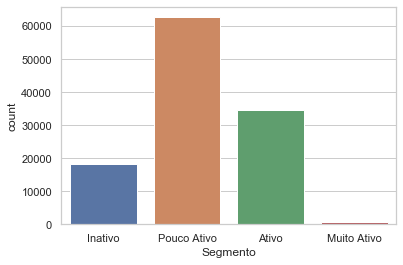

In [ ]:
sns.countplot(df_final['Segmento'])

### Medidas que podem ajudar

- Recuperar os clientes 'Inativos' com promoções e cupons de descontos direcionados.

- Fornecer descontos especiais de frete aos clientes 'Pouco Ativo'.

- Descontos especiais e atendimento personalizado aos clientes do tipo 'Muito Ativo'.